In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [3]:
df = pd.read_csv('bankchurn.csv')
df = df.drop(['Surname'], axis=1)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
1,15619304,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
2,15701354,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
3,15737888,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0
4,15574012,645,Spain,Male,44.0,8.0,113755.78,2,1,0,149756.71,1


In [4]:
df.isnull().sum(axis = 0)

CustomerId           0
CreditScore          0
Geography            0
Gender               0
Age                 22
Tenure             490
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
df_missing_values = df[df.isna().any(axis = 1)]
share_missing_churners = df_missing_values['Exited'].value_counts(normalize=True)[1]
share_overall_churners = df['Exited'].value_counts(normalize=True)[1]
print(f"share of churners in population missing values: {share_missing_churners:.0%} ")
print(f"share of churners in overall population: {share_overall_churners:.0%} ")

share of churners in population missing values: 20% 
share of churners in overall population: 20% 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9999 non-null   int64  
 1   CreditScore      9999 non-null   int64  
 2   Geography        9999 non-null   object 
 3   Gender           9999 non-null   object 
 4   Age              9977 non-null   object 
 5   Tenure           9509 non-null   float64
 6   Balance          9999 non-null   float64
 7   NumOfProducts    9999 non-null   int64  
 8   HasCrCard        9999 non-null   int64  
 9   IsActiveMember   9999 non-null   int64  
 10  EstimatedSalary  9999 non-null   float64
 11  Exited           9999 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.5+ KB


In [7]:
df = df.drop(765)
df[df['Age']=='8?']

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
df = df.dropna(subset=['Age'])

In [9]:
df['Age'].unique()

array(['41.0', '42.0', '39.0', '43.0', '44.0', '50.0', '29.0', '27.0',
       '31.0', '24.0', '34.0', '25.0', '35.0', '45.0', '58.0', '32.0',
       '38.0', '46.0', '36.0', '33.0', '40.0', '51.0', '61.0', '49.0',
       '37.0', '19.0', '66.0', '56.0', '26.0', '21.0', '55.0', '75.0',
       '22.0', '30.0', '28.0', '65.0', '48.0', '52.0', '57.0', '73.0',
       '47.0', '54.0', '72.0', '20.0', '67.0', '79.0', '62.0', '53.0',
       '80.0', '59.0', '68.0', '23.0', '60.0', '70.0', '63.0', '64.0',
       '69.0', '74.0', '71.0', '76.0', '77.0', '88.0', '85.0', '84.0',
       '78.0', '81.0', '92.0', '83.0'], dtype=object)

In [10]:
df['Age'] = df['Age'].astype('float')

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9488 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9488 non-null   int64  
 1   CreditScore      9488 non-null   int64  
 2   Geography        9488 non-null   object 
 3   Gender           9488 non-null   object 
 4   Age              9488 non-null   float64
 5   Tenure           9488 non-null   float64
 6   Balance          9488 non-null   float64
 7   NumOfProducts    9488 non-null   int64  
 8   HasCrCard        9488 non-null   int64  
 9   IsActiveMember   9488 non-null   int64  
 10  EstimatedSalary  9488 non-null   float64
 11  Exited           9488 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 963.6+ KB


In [13]:
df = pd.get_dummies(data=df)
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15647311,608,41.0,1.0,83807.86,1,0,1,112542.58,0,False,False,True,True,False
1,15619304,502,42.0,8.0,159660.80,3,1,0,113931.57,1,True,False,False,True,False
2,15701354,699,39.0,1.0,0.00,2,0,0,93826.63,0,True,False,False,True,False
3,15737888,850,43.0,2.0,125510.82,1,1,1,79084.10,0,False,False,True,True,False
4,15574012,645,44.0,8.0,113755.78,2,1,0,149756.71,1,False,False,True,False,True


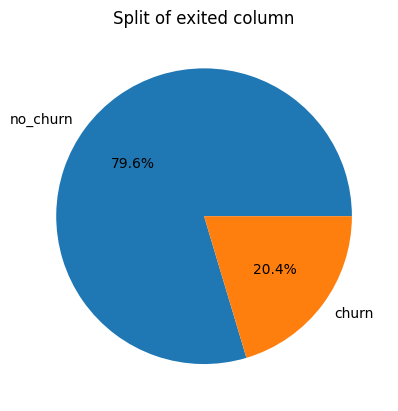

In [14]:
plt.title('Split of exited column')
plt.pie(df['Exited'].value_counts(),
        labels=['no_churn', 'churn'],
        autopct=lambda x: str(round(x, 1)) + '%');

In [15]:
boolean_columns = ['Geography_Germany', 'Geography_France', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
df[boolean_columns] = df[boolean_columns].astype(int)
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15647311,608,41.0,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
1,15619304,502,42.0,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
2,15701354,699,39.0,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
3,15737888,850,43.0,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0
4,15574012,645,44.0,8.0,113755.78,2,1,0,149756.71,1,0,0,1,0,1


In [16]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [17]:
continuous_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15647311,-0.437239,0.196689,1.0,0.114916,1,0,1,0.218493,0,0,0,1,1,0
1,15619304,-1.533475,0.292598,8.0,1.328937,3,1,0,0.242639,1,1,0,0,1,0
2,15701354,0.503870,0.004872,1.0,-1.226422,2,0,0,-0.106862,0,1,0,0,1,0
3,15737888,2.065490,0.388506,2.0,0.782369,1,1,1,-0.363144,0,0,0,1,1,0
4,15574012,-0.054590,0.484415,8.0,0.594231,2,1,0,0.865418,1,0,0,1,0,1


In [18]:
X = df.drop(['CustomerId', 'Exited'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.437239,0.196689,1.0,0.114916,1,0,1,0.218493,0,0,1,1,0
1,-1.533475,0.292598,8.0,1.328937,3,1,0,0.242639,1,0,0,1,0
2,0.503870,0.004872,1.0,-1.226422,2,0,0,-0.106862,1,0,0,1,0
3,2.065490,0.388506,2.0,0.782369,1,1,1,-0.363144,0,0,1,1,0
4,-0.054590,0.484415,8.0,0.594231,2,1,0,0.865418,0,0,1,0,1


In [19]:
Y = df['Exited']


In [20]:
ovs = RandomOverSampler()
X_ovs, y_ovs = ovs.fit_resample(X, Y)

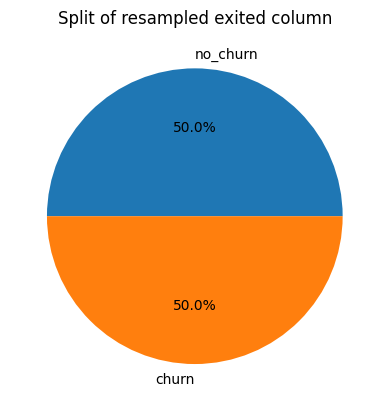

In [21]:
plt.title('Split of resampled exited column')
plt.pie(y_ovs.value_counts(),
        labels=['no_churn', 'churn'],
        autopct=lambda x: str(round(x, 1)) + '%');

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_ovs, y_ovs, test_size=0.2, random_state=11)

In [36]:
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [37]:
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'minkowski']
    },
    'Decision Tree': {
        'max_depth': [5, 10],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'Bagging': {
        'n_estimators': [50, 100],
        'max_samples': [0.5, 0.7],
        'bootstrap': [True, False]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10]
    },
    'Gradient Boosting': {
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10]
    }
}

In [38]:
outer_scores = {}
for algo_name, model in algorithms.items():
    param_grid = param_grids.get(model, {})
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', refit=True)
    nested_score = cross_val_score(grid_search, X_train, y_train, cv=3)
    outer_scores[algo_name] = nested_score
    print(f"{algo_name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}")

Logistic Regression: outer accuracy 70.47 +/- 0.27
SVM: outer accuracy 76.24 +/- 0.26
KNN: outer accuracy 77.79 +/- 0.33
Decision Tree: outer accuracy 88.25 +/- 0.60


/Users/chadiboulos/Documents/Technical days/venv_techdays/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chadiboulos/Documents/Technical days/venv_techdays/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chadiboulos/Documents/Technical days/venv_techdays/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chadiboulos/Documents/Technical days/venv_techdays/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519

AdaBoost: outer accuracy 77.36 +/- 0.49
Bagging: outer accuracy 91.17 +/- 0.14
Random Forest: outer accuracy 92.45 +/- 0.14
Gradient Boosting: outer accuracy 79.30 +/- 0.34


In [39]:
params = {'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40)
          }

estimator = xgb.XGBClassifier(objective='binary:logistic',
    nthread=4,
    seed=42)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

score_xgb = cross_val_score(grid_search, X_train, y_train, cv=3)
print(f"accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}")


Fitting 10 folds for each of 128 candidates, totalling 1280 fits


Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
accuracy 79.30 +/- 0.34


In [44]:
short_list = ['Decision Tree', 'Bagging', 'Random Forest']
for model_ in short_list:
    final_params = param_grids[model_]
    final_model = algorithms[model_]
    final_gs = GridSearchCV(final_model, final_params, scoring='accuracy', cv=3, refit=True)
    final_gs.fit(X_train, y_train)
    print(f"best parameters for {model_}: {final_gs.best_params_}")
    train_acc = accuracy_score(y_true=y_train, y_pred=final_gs.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=final_gs.predict(X_test))
    print(f'{model_} Training Accuracy: {100*train_acc:.2f}')
    print(f'{model_} Test Accuracy: {100*test_acc:.2f}')

best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Training Accuracy: 86.55
Decision Tree Test Accuracy: 81.77
best parameters for Bagging: {'bootstrap': False, 'max_samples': 0.7, 'n_estimators': 50}
Bagging Training Accuracy: 100.00
Bagging Test Accuracy: 93.28
best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Random Forest Training Accuracy: 89.33
Random Forest Test Accuracy: 84.71
